> A time series analysis will be done to understand the correlation between daily new cases and goverment policies.

In [1]:
# Install required packages
# !python -m pip install numpy
# !python -m pip install "pandas>=1.1.0"
# !python -m pip install scikit-learn
# !python -m pip install matplotlib

# Visualization
%matplotlib inline

In [178]:
# Data I/O, cleaning
import pandas as pd
import numpy as np

# Visualization
import sklearn as sk
import seaborn as sbs

# Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Evaluation metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score

# Model selection
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [133]:
# Helper functions

def regression_metrics(y_true, y_pred):
    evs = explained_variance_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2s = r2_score(y_true, y_pred)
    mxe = max_error(y_true, y_pred)
    
    print("R-sequare score:    {}".format(r2s),
          "Explained variace:  {}".format(evs),
          "Mean squared error: {}".format(mse),
          "Max residual error: {}".format(mxe), sep="\n")
    
    return dict(evs=evs, mse=mse, r2s=r2s, mxe=mxe)

def mergedata():
    pass
    
def feature_importance_histogram(model):
    pass

In [134]:
owid_oxcgrt = pd.read_csv("../data/owid_oxcgrt_merged.csv")
owid_oxcgrt.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,isBig.1
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,False
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,False
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,False
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,False
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,8.33,10.71,10.71,9.9,9.9,11.31,11.31,0.0,0.0,False


## Model training 
The model will be constructed using scikit-learn. Here we use RandomForestRegressor as our response variables are continues (nr of new daily casees), and the predictors are combination of continues and discrete variables.

### Response variable
Our aim is to predict new daily cases

### Training and testing sets


In [225]:
def pickup_country_data(dataset, iso_code="DNK", resp_var="new_cases_per_million"):
    """Subset a data set for a given country."""
    country = dataset.loc[dataset.loc[:, "iso_code"] == iso_code, :]

    # Prepare for a time series analysis
    country.date = pd.to_datetime(country['date'])
    country = country.set_index("date").loc[:, :].dropna(subset=[response_var])
    country[response_var] = country.loc[:, response_var].apply(lambda x: x/5)
    
    return country

def train_test_split(dataset, train_ratio=0.9, using_features=None):
    if using_features is None:
        

In [231]:
# Pick up one country.
country = owid_oxcgrt.loc[owid_oxcgrt.loc[:, "iso_code"] == "DNK", :]

# Response variables
response_var = "new_cases_per_million"

# Prepare for a time series analysis
country.date = pd.to_datetime(country['date'])
country = country.set_index("date").loc[:, :].dropna(subset=[response_var])
country[response_var] = country.loc[:, response_var].apply(lambda x: x/5)

# Correlation among different variables
# dfcor = country.corr()

# What features?
# country.columns.to_list()

/home/umcg-zzhang/Documents/projects/wp_aihackcovid/scripts/.env/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [232]:
features_for_train = [
    # 'iso_code',
    # 'continent',
    # 'location',
    # 'date',        # As index
    # 'total_cases',
    # 'new_cases',
    # 'new_cases_smoothed',
    # 'total_deaths',
    # 'new_deaths',
    # 'new_deaths_smoothed',
    # 'total_cases_per_million',
    'new_cases_per_million',
    # 'new_cases_smoothed_per_million',
    # 'total_deaths_per_million',
    # 'new_deaths_per_million',
    # 'new_deaths_smoothed_per_million',
    # 'reproduction_rate',
    # 'icu_patients',
    # 'icu_patients_per_million',
    # 'hosp_patients',
    # 'hosp_patients_per_million',
    # 'weekly_icu_admissions',
    # 'weekly_icu_admissions_per_million',
    # 'weekly_hosp_admissions',
    # 'weekly_hosp_admissions_per_million',
    # 'new_tests',
    # 'total_tests',
    # 'total_tests_per_thousand',
    # 'new_tests_per_thousand',
    # 'new_tests_smoothed',
    # 'new_tests_smoothed_per_thousand',
    # 'positive_rate',
    # 'tests_per_case',
    # 'tests_units',
    # 'total_vaccinations',
    # 'people_vaccinated',
    # 'people_fully_vaccinated',
    # 'new_vaccinations',
    # 'new_vaccinations_smoothed',
    # 'total_vaccinations_per_hundred',
    # 'people_vaccinated_per_hundred',
    # 'people_fully_vaccinated_per_hundred',
    # 'new_vaccinations_smoothed_per_million',
    # 'stringency_index',
    # 'population',
    # 'population_density',
    # 'median_age',
    # 'aged_65_older',
    # 'aged_70_older',
    # 'gdp_per_capita',
    # 'extreme_poverty',
    # 'cardiovasc_death_rate',
    # 'diabetes_prevalence',
    # 'female_smokers',
    # 'male_smokers',
    # 'handwashing_facilities',
    # 'hospital_beds_per_thousand',
    # 'life_expectancy',
    # 'human_development_index',
    # 'date_str',
    # 'isBig',
    # 'CountryCode',
    # 'RegionName',
    # 'RegionCode',
    # 'Jurisdiction',
    # 'Date',
    # 'C1_School closing',
    # 'C1_Flag',
    # 'C2_Workplace closing',
    # 'C2_Flag',
    # 'C3_Cancel public events',
    # 'C3_Flag',
    # 'C4_Restrictions on gatherings',
    # 'C4_Flag',
    # 'C5_Close public transport',
    # 'C5_Flag',
    # 'C6_Stay at home requirements',
    # 'C6_Flag',
    # 'C7_Restrictions on internal movement',
    # 'C7_Flag',
    # 'C8_International travel controls',
    # 'E1_Income support',
    # 'E1_Flag',
    # 'E2_Debt/contract relief',
    # 'E3_Fiscal measures',
    # 'E4_International support',
    # 'H1_Public information campaigns',
    # 'H1_Flag',
    # 'H2_Testing policy',
    # 'H3_Contact tracing',
    # 'H4_Emergency investment in healthcare',
    # 'H5_Investment in vaccines',
    # 'H6_Facial Coverings',
    # 'H6_Flag',
    # 'H7_Vaccination policy',
    # 'H7_Flag',
    # 'H8_Protection of elderly people',
    # 'H8_Flag',
    # 'M1_Wildcard',
    # 'ConfirmedCases',
    # 'ConfirmedDeaths',
     'StringencyIndex',
    # 'StringencyIndexForDisplay',
     'StringencyLegacyIndex',
    # 'StringencyLegacyIndexForDisplay',
     'GovernmentResponseIndex',
    # 'GovernmentResponseIndexForDisplay',
     'ContainmentHealthIndex',
    # 'ContainmentHealthIndexForDisplay',
     'EconomicSupportIndex',
    # 'EconomicSupportIndexForDisplay',
]

# Split dataset into X and y.
# features_for_train.remove(response_var)
x_matrix, y_vector = country.loc[:, [x for x in features_for_train if x != response_var]], country.loc[:, response_var]

# Fill NAs with zeros
x_matrix = x_matrix.fillna(0)


# Split dataset in to training and testing using 9:1 odds ratio
delimiter_time_point = x_matrix.index[int(len(x_matrix.index) * 0.9)]
x_train = x_matrix.loc[:delimiter_time_point, :]
y_train = y_vector.loc[:delimiter_time_point]
x_test = x_matrix.loc[delimiter_time_point:, :]
y_test = y_vector.loc[delimiter_time_point:]

<AxesSubplot:xlabel='date'>

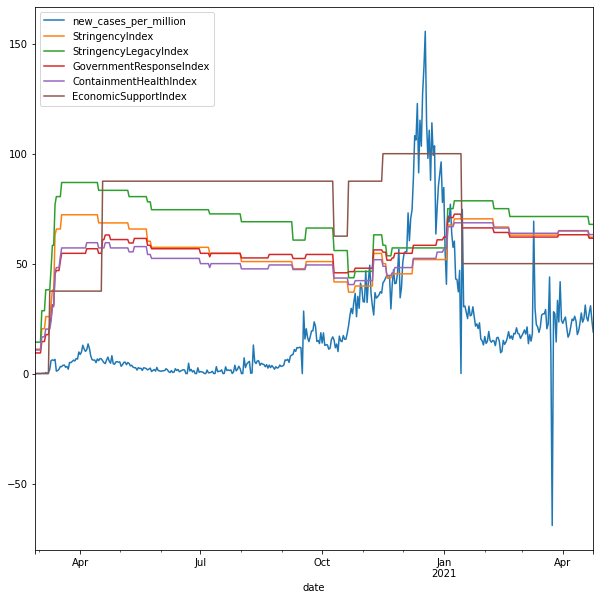

In [233]:
country.loc[:, features_for_train].plot(figsize=(10, 10))

In [216]:
# Training the model

# The model
model = RandomForestRegressor()
model = GradientBoostingRegressor()

# Search the hyperparameters in the following domain randomly.
param_domain = {
    "n_estimators": [n for n in range(20, 100)],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [d for d in range(5, 15)]
}

# Split dataset in to different CVs using forward chaining way.
time_series_cv = TimeSeriesSplit(n_splits=10)

# Setup the searcher and fit the model to trainig dataset.
random_searcher = RandomizedSearchCV(estimator=model, param_distributions=param_domain,
                                     scoring="explained_variance", cv=time_series_cv)
random_searcher.fit(x_train, y_train)

# Best score and best model
best_score = random_searcher.best_score_
best_model = random_searcher.best_estimator_

# Show some simple scores.
print("Best score: {}".format(best_score))
print("Best model: {}".format(best_model))

Best score: -0.6677563554785971
Best model: GradientBoostingRegressor(max_depth=5, max_features='auto', n_estimators=73)


In [217]:
# Test the best model from RandomSearchCV
y_true = y_test.values
y_pred = best_model.predict(x_test)

regression_metrics(y_true, y_pred)
y_pred, y_true

R-sequare score:    -28.854168663155363
Explained variace:  -5.002666198998728
Mean squared error: 38.73633420169797
Max residual error: 10.705071663604423


(array([16.7169315 , 15.98421075, 17.00181251, 17.66566218, 17.18946787,
        15.98421075, 15.38192775, 15.67884681, 16.30563072, 17.33667295,
        18.09106759, 18.1078595 , 17.98644844, 17.84903843, 16.93906004,
        15.96512129, 15.98175775, 18.09106759, 15.64433504, 17.52825217,
        15.79427536, 16.27903179, 16.302544  , 17.84903843, 17.84903843,
        16.93906004, 18.29930682, 16.62641698, 16.06517045, 16.61827379,
        16.61827379, 15.81808661, 17.52825217, 15.81808661, 16.35441636,
        20.28335742, 21.95127166, 21.39979929, 20.98745168, 21.50100328,
        21.50100328, 21.48602958, 21.01970237, 21.48602958, 21.50100328,
        21.50100328, 21.50100328, 21.50100328, 21.50100328, 20.28335742,
        15.67884681, 17.52825217, 17.52825217, 17.52825217, 17.52825217]),
 array([15.692 , 14.3092, 14.275 , 15.4356, 14.9464, 14.9506, 14.3598,
        13.9036, 12.803 , 12.3014, 12.5632, 13.2868, 13.4416, 13.6842,
        12.8098, 12.7522, 12.211 , 13.3114, 13.173 , 